In [46]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=22,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [15]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=22,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [16]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),

    layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),

    # Fully Connected Layers
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activa`tion='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(38, activation='softmax')
])

In [17]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1000,
    decay_rate=0.96
)
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_11 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 batch_normalization_12 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                      

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [21]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=100, 
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set),
    callbacks=[early_stopping]
)

Epoch 1/100
3196/3196 [==============================] - 398s 122ms/step - loss: 1.7470 - accuracy: 0.5543 - val_loss: 0.7041 - val_accuracy: 0.8285
Epoch 2/100
3196/3196 [==============================] - 395s 123ms/step - loss: 0.7391 - accuracy: 0.8064 - val_loss: 0.3470 - val_accuracy: 0.9030
Epoch 3/100
3196/3196 [==============================] - 400s 125ms/step - loss: 0.4432 - accuracy: 0.8784 - val_loss: 0.2391 - val_accuracy: 0.9305
Epoch 4/100
3196/3196 [==============================] - 387s 121ms/step - loss: 0.3014 - accuracy: 0.9164 - val_loss: 0.2278 - val_accuracy: 0.9439
Epoch 5/100
3196/3196 [==============================] - 385s 121ms/step - loss: 0.2207 - accuracy: 0.9369 - val_loss: 0.1085 - val_accuracy: 0.9665
Epoch 6/100
3196/3196 [==============================] - 385s 120ms/step - loss: 0.1686 - accuracy: 0.9523 - val_loss: 0.1083 - val_accuracy: 0.9670
Epoch 7/100
3196/3196 [==============================] - 396s 124ms/step - loss: 0.1320 - accuracy: 0.9627

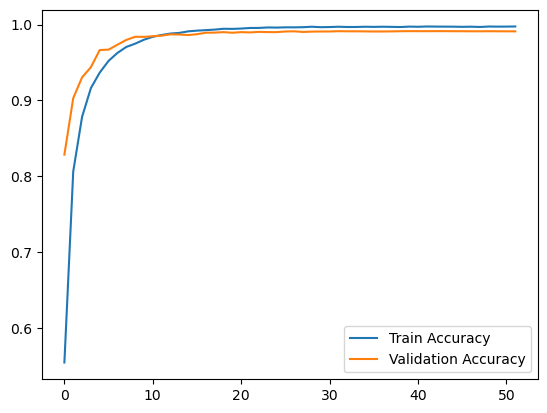

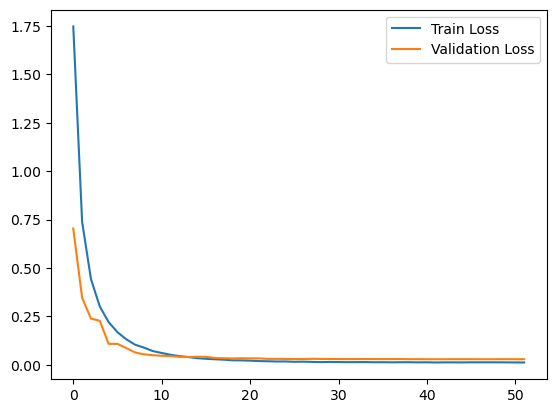

In [22]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [23]:
model.save('plant_disease_model.keras')

In [24]:
model.save('plant_disease.h5')

In [26]:
import json
with open('training_history.json', 'w') as file:
    json.dump(history.history, file)

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [39]:
class_name = validation_set.class_names

In [32]:
y_pred = model.predict(test_set)

17572/17572 [==============================] - 124s 7ms/step


In [31]:
predicted_categories = tf.argmax(model.predict(test_set), axis=1)

17572/17572 [==============================] - 122s 7ms/step


In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.99      0.99       504
                                 Apple___Black_rot       1.00      1.00      1.00       497
                          Apple___Cedar_apple_rust       0.99      1.00      1.00       440
                                   Apple___healthy       0.99      1.00      0.99       502
                               Blueberry___healthy       0.99      1.00      1.00       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       0.99      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.94      0.96       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.98      0.

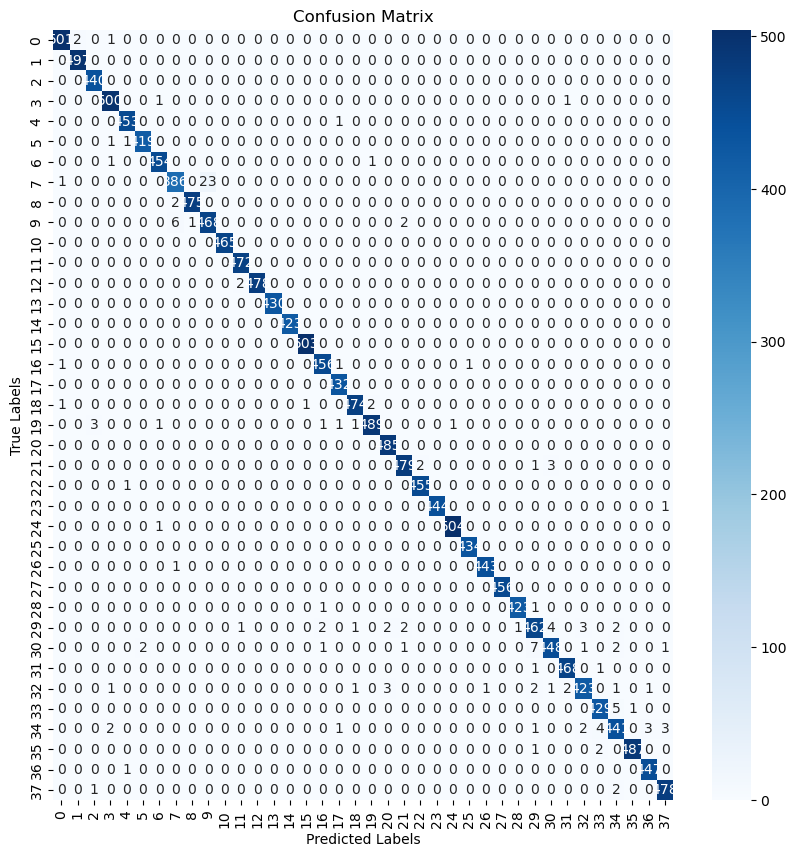

In [51]:
conf_matrix = confusion_matrix(Y_true, predicted_categories)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()